# Computational Evolutionary Biology 

_Genetic code_  -  _Evolution_  -  _Point-mutations_  -  _Error minimization_

## Genetic code has evolved to minimize the effects of errors?

Analyze if our genetic code is the better at reducing the average phenotypic effects of **single-point mutations**.\
Develop a program to generate and evaluate thousands of random genetic codes and compare their efficiency with the original genetic code. 

_Configure matplotlib to render into the browser_

In [1]:
%matplotlib widget

_Installing required packages_

In [35]:
pip install ffmpeg

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [36]:
pip install ipympl

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Loading libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from array import *
from random import *
from matplotlib.figure import Figure
from matplotlib.backends.backend_agg import FigureCanvasAgg

In [3]:
# Defining codons in a multidimensional array

codons = [
    [['u'], ['u'], ['u']], [['u'], ['u'], ['c']], [['u'], ['u'], ['a']], [['u'], ['u'], ['g']], [['c'], ['u'], ['u']], [['c'], ['u'], ['c']], [['c'], ['u'], ['a']], [['c'], ['u'], ['g']], 
    [['a'], ['u'], ['u']], [['a'], ['u'], ['c']], [['a'], ['u'], ['a']], [['a'], ['u'], ['g']], [['g'], ['u'], ['u']], [['g'], ['u'], ['c']], [['g'], ['u'], ['a']], [['g'], ['u'], ['g']], 
    [['u'], ['c'], ['u']], [['u'], ['c'], ['c']], [['u'], ['c'], ['a']], [['u'], ['c'], ['g']], [['c'], ['c'], ['u’']], [['c'], ['c'], ['c']], [['c'], ['c'], ['a']], [['c'], ['c'], ['g']], 
    [['a'], ['c'], ['u']], [['a'], ['c'], ['c']], [['a'], ['c'], ['a']], [['a'], ['c'], ['g']], [['g'], ['c'], ['u']], [['g'], ['c'], ['c']], [['g'], ['c'], ['a']], [['g'], ['c'], ['g']], 
    [['u'], ['a'], ['u']], [['u'], ['a'], ['c']], [['u'], ['a'], ['a']], [['u'], ['a'], ['g']], [['c'], ['a'], ['u']], [['c'], ['a'], ['c']], [['c'], ['a'], ['a']], [['c'], ['a'], ['g']], 
    [['a'], ['a'], ['u']], [['a'], ['a'], ['c']], [['a'], ['a'], ['a']], [['a'], ['a'], ['g']], [['g'], ['a'], ['u']], [['g'], ['a'], ['c']], [['g'], ['a'], ['a']], [['g'], ['a'], ['g']], 
    [['u'], ['g'], ['u']], [['u'], ['g'], ['c']], [['u'], ['g'], ['a']], [['u'], ['g'], ['g']], [['c'], ['g'], ['u']], [['c'], ['g'], ['c']], [['c'], ['g'], ['a']], [['c'], ['g'], ['g']], 
    [['a'], ['g'], ['u']], [['a'], ['g'], ['c']], [['a'], ['g'], ['a']], [['a'], ['g'], ['g']], [['g'], ['g'], ['u']], [['g'], ['g'], ['c']], [['g'], ['g'], ['a']], [['g'], ['g'], ['g']]
]

In [4]:
# Defining amino acids in an array

amino_acids = ['Phe', 'Phe', 'Leu', 'Leu', 'Leu', 'Leu', 'Leu', 'Leu', 
               'Ile', 'Ile', 'Ile', 'Met', 'Val', 'Val', 'Val', 'Val', 
               'Ser', 'Ser', 'Ser', 'Ser', 'Pro', 'Pro', 'Pro', 'Pro', 
               'Thr', 'Thr', 'Thr', 'Thr', 'Ala', 'Ala', 'Ala', 'Ala', 
               'Tyr', 'Tyr', 'End', 'End', 'His', 'His', 'Gln', 'Gln', 
               'Asn', 'Asn', 'Lys', 'Lys', 'Asp', 'Asp', 'Glu', 'Glu', 
               'Cys', 'Cys', 'End', 'Trp', 'Arg', 'Arg', 'Arg', 'Arg', 
               'Ser', 'Ser', 'Arg', 'Arg', 'Gly', 'Gly', 'Gly', 'Gly']

In [5]:
print("There are {} codons, {} amino acids and {} stop codon.".format(len(codons), len(np.unique(np.array(amino_acids))) - 1, len(np.unique(np.array(amino_acids))) - 20))

There are 64 codons, 20 amino acids and 1 stop codon.


In [6]:
# Original genetic code
genetic_code = [] 
for i in range(len(codons)):
    genetic_code.append([[], []])
    genetic_code[i][0].append(amino_acids[i])
    for k in range(len(codons[0])):
        genetic_code[i][1].append(codons[i][k])

In [7]:
# Function to generate random codes

def random_code(empty_code): 
    for i in range(len(codons)):
        empty_code.append([[], []])
        for k in range(len(codons[0])):
            empty_code[i][1].append(codons[i][k])
    amino_acids_copy = amino_acids[:] # copy of amino acids array 
    total_codons = len(codons)
    for i in range(len(codons)):
        random_position = randrange(total_codons) 
        empty_code[i][0].append(amino_acids_copy[random_position])
        del amino_acids_copy[random_position] # delete amino acid in array *copy 
        total_codons -= 1
    return empty_code # random genetic code

In order to count the number of mutations around an specific genetic code (whether the original or a random one), I created an specific number of functions to count them. These functions compares the codons in the same section and with their neighbors codons in both vertical and horizontal orientations.\
See **Complementary Information** for more details.

In [8]:
def uu_section(genetic_code):
    mutations = 0 # number of mutations
    x = 3
    y = 3
    z = 3
    i = 0 # start position
    k = i + 1 # switch amino acid in same section
    l = i + 4 # switch amino acid in horizontal section
    m = i + 16 # switch amino acid in vertical section
    for A in range(4): # amino acids in section (i.e. Phe, Phe, Leu, Leu)
        amino_acid = genetic_code[i][0]
        for B in range(x): # compare amino acids (same section)
            if amino_acid != genetic_code[k][0]:
                mutations += 1
                k += 1
            else:
                k += 1
        x -= 1
        for C in range(y): # compare amino acids (horizontal sections; 4 out of 4)
            if amino_acid != genetic_code[l][0]:
                mutations += 1
                l += 4
            else:
                l += 4
        for D in range(z): # compare amino acids (vertical sections; 4 out of 4)
            if amino_acid != genetic_code[m][0]:
                mutations += 1
                m += 16
            else:
                m += 16
        i += 1
        k = i + 1
        l = i + 4
        m = i + 16
    return mutations

In [9]:
def uc_section(genetic_code):
    mutations = 0 # number of mutations
    x = 3
    y = 2
    z = 3
    i = 4 # start position
    k = i + 1 # switch amino acid in same section
    l = i + 4 # switch amino acid in horizontal section
    m = i + 16 # switch amino acid in vertical section
    for A in range(4): # amino acids in section (i.e. Leu, Leu, Leu, Leu)
        amino_acid = genetic_code[i][0]
        for B in range(x): # compare amino acids (same section)
            if amino_acid != genetic_code[k][0]:
                mutations += 1
                k += 1
            else:
                k += 1
        x -= 1
        for C in range(y): # compare amino acids (horizontal sections; 3 out of 4)
            if amino_acid != genetic_code[l][0]:
                mutations += 1
                l += 4
            else:
                l += 4
        for D in range(z): # compare amino acids (vertical sections; 4 out of 4)
            if amino_acid != genetic_code[m][0]:
                mutations += 1
                m += 16
            else:
                m += 16
        i += 1
        k = i + 1
        l = i + 4
        m = i + 16
    return mutations

In [10]:
def ua_section(genetic_code):
    mutations = 0 # number of mutations
    x = 3
    y = 1
    z = 3
    i = 8 # start position
    k = i + 1 # switch amino acid in same section
    l = i + 4 # switch amino acid in horizontal section
    m = i + 16 # switch amino acid in vertical section
    for A in range(4): # amino acids in section (i.e. Ile, Ile, Ile, Met)
        amino_acid = genetic_code[i][0]
        for B in range(x): # compare amino acids (same section)
            if amino_acid != genetic_code[k][0]:
                mutations += 1
                k += 1
            else:
                k += 1
        x -= 1
        for C in range(y): # compare amino acids (horizontal sections; 2 out of 4)
            if amino_acid != genetic_code[l][0]:
                mutations += 1
                l += 4
            else:
                l += 4
        for D in range(z): # compare amino acids (vertical sections; 4 out of 4)
            if amino_acid != genetic_code[m][0]:
                mutations += 1
                m += 16
            else:
                m += 16
        i += 1
        k = i + 1
        l = i + 4
        m = i + 16
    return mutations

In [11]:
def ug_section(genetic_code):
    mutations = 0 # number of mutations
    x = 3
    y = 0
    z = 3
    i = 12 # start position
    k = i + 1 # switch amino acid in same section
    l = i + 4 # switch amino acid in horizontal section
    m = i + 16 # switch amino acid in vertical section
    for A in range(4): # amino acids in section (i.e. Val, Val, Val, Val)
        amino_acid = genetic_code[i][0]
        for B in range(x): # compare amino acids (same section)
            if amino_acid != genetic_code[k][0]:
                mutations += 1
                k += 1
            else:
                k += 1
        x -= 1
        for C in range(y): # compare amino acids (horizontal sections; 1 out of 4)
            if amino_acid != genetic_code[l][0]:
                mutations += 1
                l += 4
            else:
                l += 4
        for D in range(z): # compare amino acids (vertical sections; 4 out of 4)
            if amino_acid != genetic_code[m][0]:
                mutations += 1
                m += 16
            else:
                m += 16
        i += 1
        k = i + 1
        l = i + 4
        m = i + 16
    return mutations

In [12]:
def cu_section(genetic_code):
    mutations = 0 # number of mutations
    x = 3
    y = 3
    z = 2
    i = 16 # start position
    k = i + 1 # switch amino acid in same section
    l = i + 4 # switch amino acid in horizontal section
    m = i + 16 # switch amino acid in vertical section
    for A in range(4): # amino acids in section (i.e. Ser, Ser, Ser, Ser)
        amino_acid = genetic_code[i][0]
        for B in range(x): # compare amino acids (same section)
            if amino_acid != genetic_code[k][0]:
                mutations += 1
                k += 1
            else:
                k += 1
        x -= 1
        for C in range(y): # compare amino acids (horizontal sections; 4 out of 4)
            if amino_acid != genetic_code[l][0]:
                mutations += 1
                l += 4
            else:
                l += 4
        for D in range(z): # compare amino acids (vertical sections; 3 out of 4)
            if amino_acid != genetic_code[m][0]:
                mutations += 1
                m += 16
            else:
                m += 16
        i += 1
        k = i + 1
        l = i + 4
        m = i + 16
    return mutations

In [13]:
def cc_section(genetic_code):
    mutations = 0 # number of mutations
    x = 3
    y = 2
    z = 2
    i = 20 # start position
    k = i + 1 # switch amino acid in same section
    l = i + 4 # switch amino acid in horizontal section
    m = i + 16 # switch amino acid in vertical section
    for A in range(4): # amino acids in section (i.e. Pro, Pro, Pro, Pro)
        amino_acid = genetic_code[i][0]
        for B in range(x): # compare amino acids (same section)
            if amino_acid != genetic_code[k][0]:
                mutations += 1
                k += 1
            else:
                k += 1
        x -= 1
        for C in range(y): # compare amino acids (horizontal sections; 3 out of 4)
            if amino_acid != genetic_code[l][0]:
                mutations += 1
                l += 4
            else:
                l += 4
        for D in range(z): # compare amino acids (vertical sections; 3 out of 4)
            if amino_acid != genetic_code[m][0]:
                mutations += 1
                m += 16
            else:
                m += 16
        i += 1
        k = i + 1
        l = i + 4
        m = i + 16
    return mutations

In [14]:
def ca_section(genetic_code):
    mutations = 0 # number of mutations
    x = 3
    y = 1
    z = 2
    i = 24 # start position
    k = i + 1 # switch amino acid in same section
    l = i + 4 # switch amino acid in horizontal section
    m = i + 16 # switch amino acid in vertical section
    for A in range(4): # amino acids in section (i.e. Thr, Thr, Thr, The)
        amino_acid = genetic_code[i][0]
        for B in range(x): # compare amino acids (same section)
            if amino_acid != genetic_code[k][0]:
                mutations += 1
                k += 1
            else:
                k += 1
        x -= 1
        for C in range(y): # compare amino acids (horizontal sections; 2 out of 4)
            if amino_acid != genetic_code[l][0]:
                mutations += 1
                l += 4
            else:
                l += 4
        for D in range(z): # compare amino acids (vertical sections; 3 out of 4)
            if amino_acid != genetic_code[m][0]:
                mutations += 1
                m += 16
            else:
                m += 16
        i += 1
        k = i + 1
        l = i + 4
        m = i + 16
    return mutations

In [15]:
def cg_section(genetic_code):
    mutations = 0 # number of mutations
    x = 3
    y = 0
    z = 2
    i = 28 # start position
    k = i + 1 # switch amino acid in same section
    l = i + 4 # switch amino acid in horizontal section
    m = i + 16 # switch amino acid in vertical section
    for A in range(4): # amino acids in section (i.e. Ala, Ala, Ala, Ala)
        amino_acid = genetic_code[i][0]
        for B in range(x): # compare amino acids (same section)
            if amino_acid != genetic_code[k][0]:
                mutations += 1
                k += 1
            else:
                k += 1
        x -= 1
        for C in range(y): # compare amino acids (horizontal sections; 1 out of 4)
            if amino_acid != genetic_code[l][0]:
                mutations += 1
                l += 4
            else:
                l += 4
        for D in range(z): # compare amino acids (vertical sections; 3 out of 4)
            if amino_acid != genetic_code[m][0]:
                mutations += 1
                m += 16
            else:
                m += 16
        i += 1
        k = i + 1
        l = i + 4
        m = i + 16
    return mutations

In [16]:
def au_section(genetic_code):
    mutations = 0 # number of mutations
    x = 3
    y = 3
    z = 1
    i = 32 # start position
    k = i + 1 # switch amino acid in same section
    l = i + 4 # switch amino acid in horizontal section
    m = i + 16 # switch amino acid in vertical section
    for A in range(4): # amino acids in section (i.e. Tyr, Tyr, End, End)
        amino_acid = genetic_code[i][0]
        for B in range(x): # compare amino acids (same section)
            if amino_acid != genetic_code[k][0]:
                mutations += 1
                k += 1
            else:
                k += 1
        x -= 1
        for C in range(y): # compare amino acids (horizontal sections; 4 out of 4)
            if amino_acid != genetic_code[l][0]:
                mutations += 1
                l += 4
            else:
                l += 4
        for D in range(z): # compare amino acids (vertical sections; 2 out of 4)
            if amino_acid != genetic_code[m][0]:
                mutations += 1
                m += 16
            else:
                m += 16
        i += 1
        k = i + 1
        l = i + 4
        m = i + 16
    return mutations 

In [17]:
def ac_section(genetic_code):
    mutations = 0 # number of mutations
    x = 3
    y = 2
    z = 1
    i = 36 # start position
    k = i + 1 # switch amino acid in same section
    l = i + 4 # switch amino acid in horizontal section
    m = i + 16 # switch amino acid in vertical section
    for A in range(4): # amino acids in section (i.e. His, His, Gln, Gln)
        amino_acid = genetic_code[i][0]
        for B in range(x): # compare amino acids (same section)
            if amino_acid != genetic_code[k][0]:
                mutations += 1
                k += 1
            else:
                k += 1
        x -= 1
        for C in range(y): # compare amino acids (horizontal sections; 3 out of 4)
            if amino_acid != genetic_code[l][0]:
                mutations += 1
                l += 4
            else:
                l += 4
        for D in range(z): # compare amino acids (vertical sections; 2 out of 4)
            if amino_acid != genetic_code[m][0]:
                mutations += 1
                m += 16
            else:
                m += 16
        i += 1
        k = i + 1
        l = i + 4
        m = i + 16
    return mutations 

In [18]:
def aa_section(genetic_code):
    mutations = 0 # number of mutations
    x = 3
    y = 1
    z = 1
    i = 40 # start position
    k = i + 1 # switch amino acid in same section
    l = i + 4 # switch amino acid in horizontal section
    m = i + 16 # switch amino acid in vertical section
    for A in range(4): # amino acids in section (i.e. Asn, Asn, Lys, Lys)
        amino_acid = genetic_code[i][0]
        for B in range(x): # compare amino acids (same section)
            if amino_acid != genetic_code[k][0]:
                mutations += 1
                k += 1
            else:
                k += 1
        x -= 1
        for C in range(y): # compare amino acids (horizontal sections; 2 out of 4)
            if amino_acid != genetic_code[l][0]:
                mutations += 1
                l += 4
            else:
                l += 4
        for D in range(z): # compare amino acids (vertical sections; 2 out of 4)
            if amino_acid != genetic_code[m][0]:
                mutations += 1
                m += 16
            else:
                m += 16
        i += 1
        k = i + 1
        l = i + 4
        m = i + 16
    return mutations

In [19]:
def ag_section(genetic_code):
    mutations = 0 # number of mutations
    x = 3
    y = 0
    z = 1
    i = 44 # start position
    k = i + 1 # switch amino acid in same section
    l = i + 4 # switch amino acid in horizontal section
    m = i + 16 # switch amino acid in vertical section
    for A in range(4): # amino acids in section (i.e. Asp, Asp, Glu Glu)
        amino_acid = genetic_code[i][0]
        for B in range(x): # compare amino acids (same section)
            if amino_acid != genetic_code[k][0]:
                mutations += 1
                k += 1
            else:
                k += 1
        x -= 1
        for C in range(y): # compare amino acids (horizontal sections; 1 out of 4)
            if amino_acid != genetic_code[l][0]:
                mutations += 1
                l += 4
            else:
                l += 4
        for D in range(z): # compare amino acids (vertical sections; 2 out of 4)
            if amino_acid != genetic_code[m][0]:
                mutations += 1
                m += 16
            else:
                m += 16
        i += 1
        k = i + 1
        l = i + 4
        m = i + 16
    return mutations

In [20]:
def gu_section(genetic_code):
    mutations = 0 # number of mutations
    x = 3
    y = 3
    z = 0
    i = 48 # start position
    k = i + 1 # switch amino acid in same section
    l = i + 4 # switch amino acid in horizontal section
    m = i + 16 # switch amino acid in vertical section
    for A in range(4): # amino acids in section (i.e. Cys, Cys, End, Trp)
        amino_acid = genetic_code[i][0]
        for B in range(x): # compare amino acids (same section)
            if amino_acid != genetic_code[k][0]:
                mutations += 1
                k += 1
            else:
                k += 1
        x -= 1
        for C in range(y): # compare amino acids (horizontal sections; 4 out of 4)
            if amino_acid != genetic_code[l][0]:
                mutations += 1
                l += 4
            else:
                l += 4
        for D in range(z): # compare amino acids (vertical sections; 1 out of 4)
            if amino_acid != genetic_code[m][0]:
                mutations += 1
                m += 16
            else:
                m += 16
        i += 1
        k = i + 1
        l = i + 4
        m = i + 16
    return mutations

In [21]:
def gc_section(genetic_code):
    mutations = 0 # number of mutations
    x = 3
    y = 2
    z = 0
    i = 52 # start position
    k = i + 1 # switch amino acid in same section
    l = i + 4 # switch amino acid in horizontal section
    m = i + 16 # switch amino acid in vertical sgenetic_codeection
    for A in range(4): # amino acids in section (i.e. Arg, Arg, Arg, Arg)
        amino_acid = genetic_code[i][0]
        for B in range(x): # compare amino acids (same section)
            if amino_acid != genetic_code[k][0]:
                mutations += 1
                k += 1
            else:
                k += 1
        x -= 1
        for C in range(y): # compare amino acids (horizontal sections; 3 out of 4)
            if amino_acid != genetic_code[l][0]:
                mutations += 1
                l += 4
            else:
                l += 4
        for D in range(z): # compare amino acids (vertical sections; 1 out of 4)
            if amino_acid != genetic_code[m][0]:
                mutations += 1
                m += 16
            else:
                m += 16
        i += 1
        k = i + 1
        l = i + 4
        m = i + 16
    return mutations

In [22]:
def ga_section(genetic_code):
    mutations = 0 # number of mutations
    x = 3
    y = 1
    z = 0
    i = 56 # start position
    k = i + 1 # switch amino acid in same section
    l = i + 4 # switch amino acid in horizontal section
    m = i + 16 # switch amino acid in vertical section
    for A in range(4): # amino acids in section (i.e. Ser, Ser, Arg, Arg)
        amino_acid = genetic_code[i][0]
        for B in range(x): # compare amino acids (same section)
            if amino_acid != genetic_code[k][0]:
                mutations += 1
                k += 1
            else:
                k += 1
        x -= 1
        for C in range(y): # compare amino acids (horizontal sections; 2 out of 4)
            if amino_acid != genetic_code[l][0]:
                mutations += 1
                l += 4
            else:
                l += 4
        for D in range(z): # compare amino acids (vertical sections; 1 out of 4)
            if amino_acid != genetic_code[m][0]:
                mutations += 1
                m += 16
            else:
                m += 16
        i += 1
        k = i + 1
        l = i + 4
        m = i + 16
    return mutations

In [23]:
def gg_section(genetic_code):
    mutations = 0 # number of mutations
    x = 3
    y = 0
    z = 0
    i = 60 # start position
    k = i + 1 # switch amino acid in same section
    l = i + 4 # switch amino acid in horizontal section
    m = i + 16 # switch amino acid in vertical section
    for A in range(4): # amino acids in section (i.e. Gly, Gly, Gly, Gly)
        amino_acid = genetic_code[i][0]
        for B in range(x): # compare amino acids (same section)
            if amino_acid != genetic_code[k][0]:
                mutations += 1
                k += 1
            else:
                k += 1
        x -= 1
        for C in range(y): # compare amino acids (horizontal sections; 1 out of 4)
            if amino_acid != genetic_code[l][0]:
                mutations += 1
                l += 4
            else:
                l += 4
        for D in range(z): # compare amino acids (vertical sections; 1 out of 4)
            if amino_acid != genetic_code[m][0]:
                mutations += 1
                m += 16
            else:
                m += 16
        i += 1
        k = i + 1
        l = i + 4
        m = i + 16
    return mutations

In [24]:
# Function to sum up all the mutations around genetic code
    
def total_mutations(genetic_code):
    total = uu_section(genetic_code) + uc_section(genetic_code) + ua_section(genetic_code) + ug_section(genetic_code) + cu_section(genetic_code) + cc_section(genetic_code) + ca_section(genetic_code) + cg_section(genetic_code) + au_section(genetic_code) + ac_section(genetic_code) + aa_section(genetic_code) + ag_section(genetic_code) + gu_section(genetic_code) + gc_section(genetic_code) + ga_section(genetic_code) + gg_section(genetic_code)
    return total

In [25]:
# Function to generate multiple genetic codes and sum up all the mutations around them

mutations_frequencies = []

def frequencies(results):
    for i in range(len(codons)*10000):
        empty_code = []
        random_code(empty_code)
        results.append(total_mutations(empty_code))
    return results

results = frequencies(mutations_frequencies)

In [26]:
print("{} genetic codes were generated and evaluated, with a maximum number of {} mutations and a minimum of {} mutations".format(len(results), max(results), min(results)))

640000 genetic codes were generated and evaluated, with a maximum number of 288 mutations and a minimum of 258 mutations


In [27]:
results_dataframe = pd.DataFrame(results, columns=['# Mutations'])
results_dataframe.describe()

,# Mutations
count,640000.000000
mean,275.143989
std,3.238719
min,258.000000
25%,273.000000
50%,275.000000
75%,277.000000
max,288.000000


## Histogram

In [67]:
plt.plot?

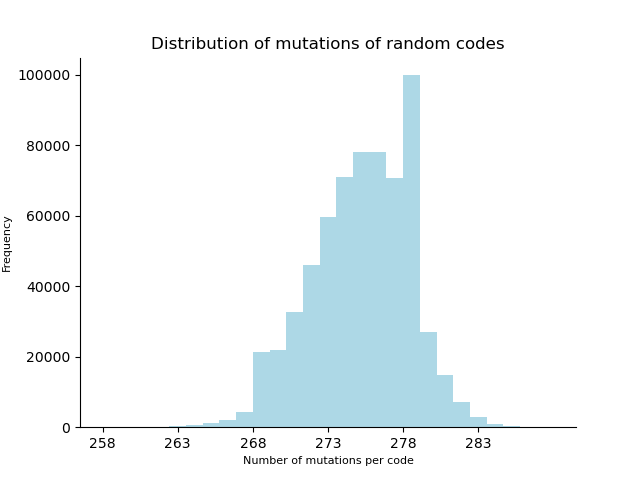

In [32]:
plt.figure()

plt.title("Distribution of mutations of random codes", fontsize = 12)
plt.xlabel("Number of mutations per code", fontsize = 8)
plt.ylabel("Frequency", fontsize = 8)

ax = plt.gca()
ax.spines[['top', 'right']].set_visible(False)
ax.hist(results, bins = 27, facecolor = '#ADD8E6', 
        linewidth = 0.5)
ax.set_xticks(np.arange(min(results), max(results), 5))
ax.set_yticks([0, 20000, 40000, 60000, 80000, 100000])

## Animated Histogram

In [33]:
mutations_frequencies = []

def frequencies(results):
    for i in range(len(codons)*100):
        empty_code = []
        random_code(empty_code)
        results.append(total_mutations(empty_code))
    return results

results = frequencies(mutations_frequencies)

In [34]:
n = len(results)

In [35]:
def update_hist(frame):
    if frame == n:
        animation.event_source.stop()
    bins = np.arange(260, 290, 1)
    
    plt.cla() # clear current axis
    
    plt.hist(results[:frame], bins = bins, color = '#ADD8E6')
    plt.gca().set_xticks(np.arange(min(results), max(results), 5))
    plt.gca().set_yticks([0, 200, 400, 600, 800])
    ax = plt.gca()
    ax.spines[['top', 'right']].set_visible(False)
    plt.gca().set_title("Distribution of mutations of random codes", fontsize = 12)
    plt.gca().set_xlabel("Number of mutations per code", fontsize = 8)
    plt.ylabel("Frequency", fontsize = 8)
    plt.gca().annotate('n = {}'.format(n), [5, 275])

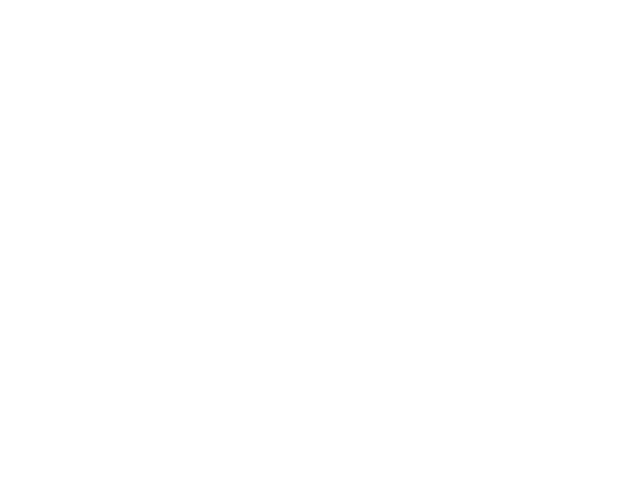

In [36]:
fig = plt.figure()

animation = animation.FuncAnimation(fig = fig, func = update_hist, interval = 0.001, blit = True, save_count = 301)

In [37]:
from IPython.display import Image
from IPython.core.display import HTML

In [ ]:
HTML(animation.to_html5_video())

## Conclusions

### The genetic code is not random

We generate and evaluate 640,000 random genetic codes, the results where stored in an Array object, which we use to generate both histogram and animated histogram, and obtain the descriptive statistics using the _describe_ method. 
The **average** number of mutations was about 275, while the **minimum** and **maximum** were 258 and 288 mutations, respectively.

According to the _total_mutations_ function there are 219 mutations around the original genetic code, note that this function only count the **single-point mutations** (i.e. a genetic mutation where a single nucleotide base is changed; for more info see [NIH](genome.gov/genetics-glossary/Point-Mutation)). 

This shows that this process was result of nonrandom patterns in the distribution of codon assignments. The actual genetic code minimized the effects of **errors**. These results are based on the number of random alternative codes that were generated and evaluated, since the number of mutations are higher than the mutations present in the original genetic code.

We can conclude that the original genetic code is so **efficient at minimizing the effects of errors**, therefore we can say that it's not a product of a random process, it have been changing and improving over time. 

## Complementary Information

### Arrangement used to develop functions

According to the chart below we can say genetic code divides in 16 sections, being the **first** one the section including the codons [ uuu, uuc, uua, uug ] corresponding to _Phe_, _Phe_, _Leu_, _Leu_, respectively, the **second** one the section including the codons [ cuu, cuc, cua, cug ] all of them corresponding to _Leu_, and so on, being the **last** section the one including the codons [ ggu, ggc, gga, ggg ] all of them corresponding to _Gly_. Functions were developed given that arrangement were **16 sections** divides the genetic code, therefore **16 functions** were developed in order to count all the mutations around the genetic code.

+ Every function **compares** the codons and the amino acid that it codifies, for example if codons _uuu_ and _uuc_ codifies to a different amino acid it would be an **error**, otherwise it wouldn't be.
+ Every function is **initialized** with different values at position parameters (_x_, _y_ and _z_) and start codon (_i_) depending of the section, for example the first section starts at codon _uuu_ (position _i_ = 0) with values _x = 3_, _y = 3_ and _z = 3_, while the fifth section starts at codon _ucu_ (position _i_ = 16) with values _x = 3_, _y = 3_ and _z = 2_. _x_ determines the number of codons in the section, _y_ determines the remaining neighbors to compare with in **horizontal** orientation, while _z_ determines the remaining neighbors to compare with in **vertical** orientation.
  
In that way we ensure that all codons and its corresponding amino acid were compare and considered for the number of mutations in every genetic code.

In [40]:
Image(url="https://xaktly.com/Images/Biology/GeneticCode/GeneticCode.png", width=480, height=480)